In [173]:
import gymnasium as gym
import highway_env
import matplotlib.pyplot as plt

In [91]:
# check the action space
env.action_type.actions_indexes

{'LANE_LEFT': 0, 'IDLE': 1, 'LANE_RIGHT': 2, 'FASTER': 3, 'SLOWER': 4}

In [23]:
# check the observation space
obs = env.observation_type.observe()
obs

array([[ 1.        ,  1.        ,  0.25      ,  0.3125    ,  0.        ],
       [ 1.        ,  0.08186078,  0.25      , -0.0500339 ,  0.        ],
       [ 1.        ,  0.1731585 , -0.25      , -0.10128043,  0.        ],
       [ 1.        ,  0.2903909 , -0.25      , -0.05860636,  0.        ],
       [ 1.        ,  0.39695203,  0.        , -0.05640211,  0.        ]],
      dtype=float32)

In [154]:
env.observation_type.space()

Box(-inf, inf, (5, 5), float32)

In [182]:
env.config

{'observation': {'type': 'Kinematics',
  'vehicles_count': 5,
  'features': ['presence', 'x', 'y', 'vx', 'vy'],
  'features_range': {'x': [-100, 100],
   'y': [-100, 100],
   'vx': [-20, 20],
   'vy': [-20, 20]},
  'absolute': False,
  'order': 'sorted',
  'see_behind': True,
  'lanes_count': 4},
 'action': {'type': 'DiscreteMetaAction'},
 'simulation_frequency': 5,
 'policy_frequency': 1,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'screen_width': 600,
 'screen_height': 150,
 'centering_position': [0.3, 0.5],
 'scaling': 5.5,
 'show_trajectories': False,
 'render_agent': True,
 'offscreen_rendering': False,
 'manual_control': False,
 'real_time_rendering': False,
 'lanes_count': 3,
 'vehicles_count': 20,
 'controlled_vehicles': 1,
 'initial_lane_id': None,
 'duration': 30,
 'ego_spacing': 1.5,
 'vehicles_density': 1,
 'collision_reward': -1,
 'right_lane_reward': 0.1,
 'high_speed_reward': 0.4,
 'lane_change_reward': 0,
 'reward_speed_range': [20, 30],
 'normal

In [249]:
config = {
    "observation": {
        "type": "Kinematics",
        "vehicles_count": 5,
        "features": ["presence", "x", "y", "vx", "vy"],
        "features_range": {
            "x": [-100, 100],
            "y": [-100, 100],
            "vx": [-20, 20],
            "vy": [-20, 20]
        },
        "absolute": False,
        "order": "sorted",
        "see_behind": True,
    }
}


# env = gym.make('highway-v0')
env = gym.make('highway-fast-v0')
env.configure(config)
obs, info = env.reset()
print(obs.shape)

(5, 5)


/opt/conda/lib/python3.8/site-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(


In [267]:
# test with a random agent
NUM_EPISODES = 10
total_rewards = []
collision_rate = 0
duration_env = env.config['duration']

obs, info = env.reset()
custPrint = CustomPrint(env)
for episode in range(NUM_EPISODES):
    obs, info = env.reset()
    episode_reward = 0
    done = False
    truncated = False
    while not done and not truncated:
        action = env.action_space.sample()
        obs, reward, done, truncated, info = env.step(action)
        episode_reward += reward
        # custPrint.print_action(action)
        custPrint.print_obs(obs)
        env.render()

    total_rewards.append(episode_reward)
    
    if info['crashed']:
        collision_rate += 1
    
env.close()

avg_rewards = sum(total_rewards) / NUM_EPISODES
collision_rate = collision_rate / NUM_EPISODES

print(f"Average reward per episode: {avg_rewards}")
print(f"Collision percentage rate: {collision_rate*100}%")




ego-vehicle: presence: 1.0, x: 1.0000, y: 0.0800, vx: 1.0000, vy: 0.0000
vehicle 1: presence: 1.0, x: 0.2100, y: -0.0400, vx: 0.0400, vy: 0.0000
vehicle 2: presence: 1.0, x: 0.4100, y: -0.0800, vx: -0.1800, vy: 0.0000
vehicle 3: presence: 1.0, x: 0.6700, y: -0.0800, vx: -0.1300, vy: 0.0000
vehicle 4: presence: 1.0, x: 0.9400, y: -0.0800, vx: 0.0600, vy: 0.0000

ego-vehicle: presence: 1.0, x: 1.0000, y: 0.0800, vx: 1.0000, vy: 0.0000
vehicle 1: presence: 1.0, x: 0.2200, y: -0.0400, vx: 0.0600, vy: 0.0000
vehicle 2: presence: 1.0, x: 0.3700, y: -0.0800, vx: -0.2500, vy: 0.0000
vehicle 3: presence: 1.0, x: 0.6400, y: -0.0800, vx: -0.1400, vy: 0.0000
vehicle 4: presence: 1.0, x: 0.9500, y: -0.0800, vx: 0.0700, vy: 0.0000

ego-vehicle: presence: 1.0, x: 1.0000, y: 0.0800, vx: 1.0000, vy: 0.0000
vehicle 1: presence: 1.0, x: 0.2300, y: -0.0400, vx: 0.0500, vy: 0.0000
vehicle 2: presence: 1.0, x: 0.3200, y: -0.0800, vx: -0.2700, vy: 0.0000
vehicle 3: presence: 1.0, x: 0.6200, y: -0.0800, vx: 

In [266]:
class CustomPrint():
    def __init__(self, env):
        self.swapped_dict = {value: key for key, value in env.action_type.actions_indexes.items()}
        self.prev_output_len_action = 0
        self.prev_output_len_obs = 0
    def print_action(self, action):
        action_str = f"action: {self.swapped_dict[action]}"
        print(" " * self.prev_output_len_action, end='\r')
        print(action_str, end="\r")
        self.prev_output_len_action = len(action_str)
    def print_obs(self, obs):
        print()
        for i, row in enumerate(obs):
            presence, x, y, vx, vy = row.round(2)
            vehicle_name = f"vehicle {i}" if i!=0 else f"ego-vehicle"
            print(f"{vehicle_name}: presence: {presence}, x: {x:.4f}, y: {y:.4f}, vx: {vx:.4f}, vy: {vy:.4f}")

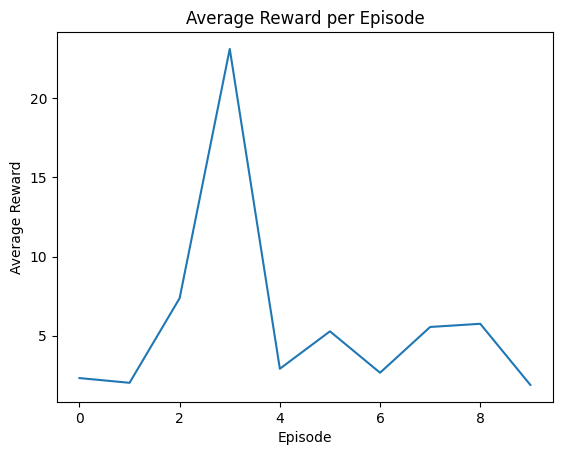

In [258]:
# plot the average reward per episode
plt.plot(total_rewards)
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Average Reward per Episode")
plt.show()